In [7]:
# 텍스트 분석 기초 도구 설치

# !pip install nltk
# !pip install JPype1
# konlpy는 ( JDK, JPype1 )에 의존
# !pip install konlpy
# !pip install wordcloud

In [3]:
#

In [1]:
# 분석할 데이터 크롤링1. HTML 데이터 가져오기

import requests
from bs4 import BeautifulSoup
from selenium.webdriver import Chrome

# 서버에서 코드를 통한 요청을 제한
# resp = requests.get("https://news.stanford.edu/2005/06/14/jobs-061505/")
# print(resp.status_code)
# resp.text[:200]

path = "D:\ssac-one2\dev-tools\chromedriver.exe"
browser = Chrome(executable_path=path)
browser.get("https://news.stanford.edu/2005/06/14/jobs-061505/")
speech_html = browser.page_source
browser.close()

In [4]:
# 분석할 데이터 크롤링2. HTML에서 연설 내용 가져오기

# speech_html[:200]
soup = BeautifulSoup(speech_html, "html.parser")
content_div = soup.select_one("#story-content")
speech_content = content_div.get_text()

In [7]:
# 텍스트 데이터를 형태소 분해

import nltk

tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokenized_speech_content = tokenizer.tokenize(speech_content)
# len(tokenized_speech_content) # 중간 결과 확인
# tokenized_speech_content[:20] # 중간 결과 확인

2317

In [9]:
# 단어별 빈도수 계산

from collections import Counter

tokenized_speech_counter = Counter(tokenized_speech_content)
# tokenized_speech_counter # 

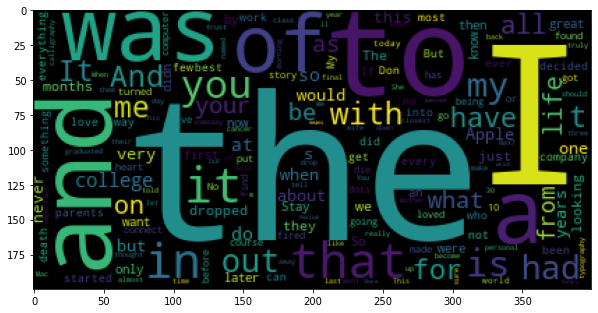

In [10]:
# 워드클라우드 사용해서 데이터 시각화

from wordcloud import WordCloud
import matplotlib.pyplot as plt

speech_wordcloud = WordCloud().generate_from_frequencies(tokenized_speech_counter)

plt.figure(figsize=(10, 10))
plt.imshow(speech_wordcloud)
plt.show()


In [18]:
# 불용어 제거 (stopwords)

# nltk.download('stopwords') # nltk 설치 후 한 번만 실행

from nltk.corpus import stopwords

en_stopwords = stopwords.words('english')

my_stopwords = en_stopwords + ['would', 'get', 'never', 'months']

filtered_tokenized_speech_content = [ token for token in tokenized_speech_content if token.lower() not in my_stopwords ]

filtered_speech_counter = Counter(filtered_tokenized_speech_content)

# filtered_speech_counter

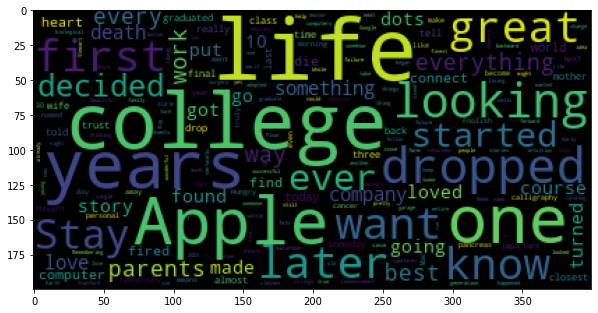

In [19]:
# 워드클라우드 사용해서 데이터 시각화

from wordcloud import WordCloud
import matplotlib.pyplot as plt

speech_wordcloud = WordCloud().generate_from_frequencies(filtered_speech_counter)

plt.figure(figsize=(10, 10))
plt.imshow(speech_wordcloud)
plt.show()

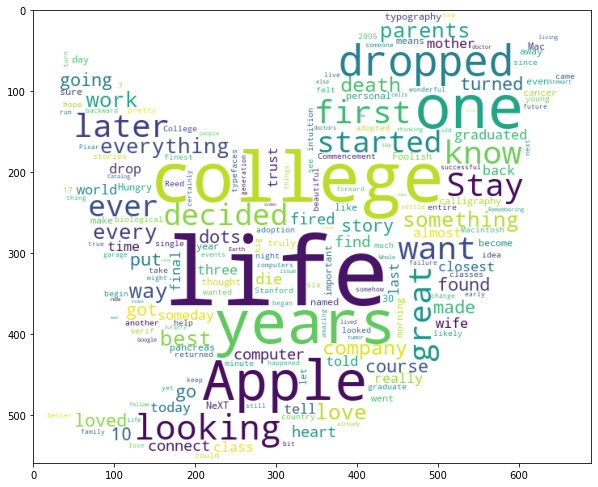

In [40]:
# 워드클라우드 결과를 이미지 내부에 표현

# !pip install pillow
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

mask_image = Image.open('data-files/mask.png')
mask = np.array(mask_image)
# print( mask ) # 확인 코드

speech_wordcloud = WordCloud(mask=mask, background_color='white').generate_from_frequencies(filtered_speech_counter)

plt.figure(figsize=(10, 10))
plt.imshow(speech_wordcloud)
plt.show()

95

In [41]:
## 한글 텍스트 분석 처리

In [3]:
# 데이터 준비
with open('data-files/text-data.txt', 'rt', encoding="utf-8") as f:
    speech_content = f.read()

speech_content[:100]

'존경하는 국민 여러분,\n \n오늘 여든 네 번째 3, 1절을 맞아 나라를 위해 희생하고 헌신하신 애국선열들께 한없는 감사와 경의를 표합니다. 독립유공자와 유가족 여러분에게도 존경과 '

In [1]:
# whl 파일 다운로드 후 직접 설치 ( 다운로드 경로 : https://pypi.org/project/JPype1/#files )
# !pip install "D:\\ssac-one\\JPype1-1.2.0-cp37-cp37m-win_amd64.whl"

Processing d:\ssac-one\jpype1-1.2.0-cp37-cp37m-win_amd64.whl


In [9]:
# 한글 형태소 추출
from konlpy.tag import Okt # Kkma, Komoran, Mecab
from collections import Counter

okt = Okt()

noun_list = okt.nouns(speech_content)
# print(noun_list[:5]) # 확인 코드
noun_counter = Counter(noun_list)
# print( noun_counter ) # 확인 코드

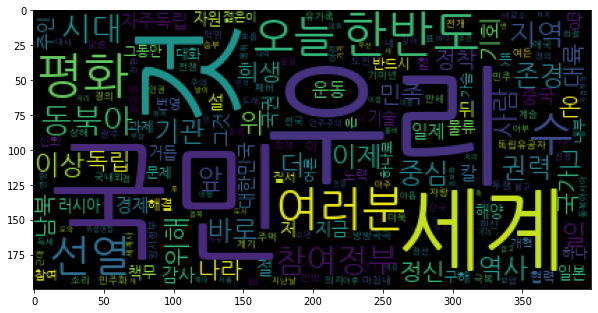

In [11]:
# 워드클라우드를 사용해서 단어 빈도수 시각화

from wordcloud import WordCloud
import matplotlib.pyplot as plt

speech_wordcloud = WordCloud(font_path="C:/Windows/Fonts/NanumGothic.ttf").generate_from_frequencies(noun_counter)

plt.figure(figsize=(10, 10))
plt.imshow(speech_wordcloud)
plt.show()

In [14]:
# 불용어 크롤링

import requests
from bs4 import BeautifulSoup
from bs4.element import NavigableString

resp = requests.get("https://www.ranks.nl/stopwords/korean", verify=False)
print( resp.status_code ) # 확인 코드

soup = BeautifulSoup(resp.text, "html.parser")

tds = soup.select('.panel-body table td')
ko_stopwords = []
for td in tds:
    for c in td.children:
        if type(c) == NavigableString:
            ko_stopwords.append(str(c).strip())


200


In [15]:
ko_stopwords[:10]

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']

In [16]:
# 데이터에서 불용어 제거
noun_list = [ n for n in noun_list if n not in ko_stopwords ]
noun_counter = Counter(noun_list)

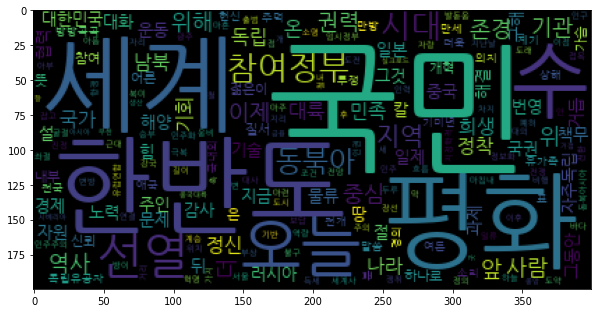

In [17]:
# 워드클라우드를 사용해서 단어 빈도수 시각화

from wordcloud import WordCloud
import matplotlib.pyplot as plt

speech_wordcloud = WordCloud(font_path="C:/Windows/Fonts/NanumGothic.ttf").generate_from_frequencies(noun_counter)

plt.figure(figsize=(10, 10))
plt.imshow(speech_wordcloud)
plt.show()